In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [41]:
df_train = pd.read_csv("train_users_2.csv")  
df_train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [42]:
# shape and data types of the data
print(df_train.dtypes)

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object


In [43]:
dimension = df_train.shape
NbrLignes = df_train.shape[0]
NbrColonnes = df_train.shape[1]
print("Dimension :",dimension)
print("Nombre de lignes :",NbrLignes)
print("Nombre de colonnes :",NbrColonnes)

Dimension : (213451, 16)
Nombre de lignes : 213451
Nombre de colonnes : 16


In [44]:
# select numeric columns
df_numeric = df_train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['timestamp_first_active' 'age' 'signup_flow']


In [45]:
# select non numeric columns
df_non_numeric = df_train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'date_account_created' 'date_first_booking' 'gender' 'signup_method'
 'language' 'affiliate_channel' 'affiliate_provider'
 'first_affiliate_tracked' 'signup_app' 'first_device_type'
 'first_browser' 'country_destination']


In [46]:
#Regarder s'il y a des valeurs nulles dans le fichier
df_train.isnull().values.any() 

True

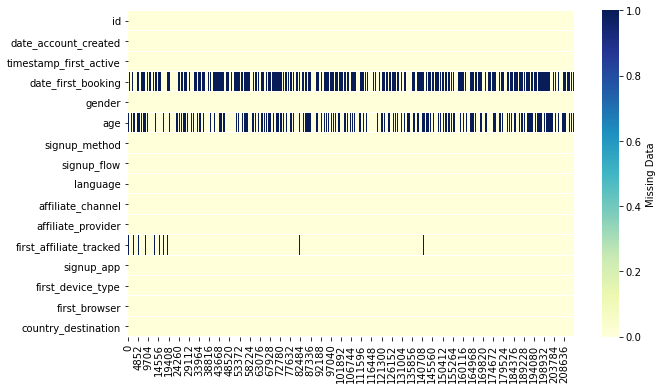

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


In [48]:
# Trouver les valeurs manquantes et identifier les colonnes
missing_values = ["NaN","?","-unknown-"]
data = pd.read_csv("train_users_2.csv", na_values = missing_values)
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser               27266
country_destination             0
dtype: int64

<AxesSubplot:ylabel='age'>

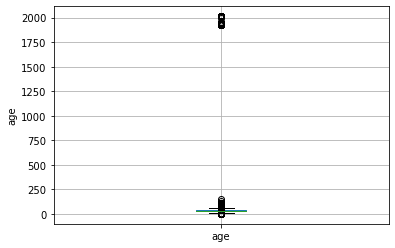

In [49]:
# Outliners age
df=df_train["age"]
df_frame = pd.DataFrame(df)
plt.ylabel('age')
df_frame.boxplot(figsize=(15,5))

In [50]:
X1 = df_train.select_dtypes(exclude=['object'])

X2 = df_train.select_dtypes(include=[object])

X1.head()

,timestamp_first_active,age,signup_flow
0,20090319043255,NaN,0
1,20090523174809,38.0,0
2,20090609231247,56.0,3
3,20091031060129,42.0,0
4,20091208061105,41.0,0


In [51]:
X2.head()

,id,date_account_created,date_first_booking,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,NaN,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,NaN,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2010-02-18,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [52]:
X2 = X2.set_index(['id', 'date_account_created','date_first_booking'])
X2.head()

,,,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,date_account_created,date_first_booking,,,,,,,,,,
gxn3p5htnn,2010-06-28,NaN,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,NaN,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2010-02-18,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
X2 = X2.set_index(['id', 'date_account_created','date_first_booking'])
X2.head()
X2=pd.get_dummies(X2,)
X2.head()
sc = StandardScaler()
Z = sc.fit_transform(X1)
Z1 = pd.DataFrame(data = Z, columns = X1.columns)
X2.reset_index(drop=True, inplace=True)
Z1.reset_index(drop=True, inplace=True)

X=pd.concat([Z1,X2],axis=1)

X=pd.DataFrame(X)
X.head()

In [53]:
X2=pd.get_dummies(X2,)
X2.head()

,,,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,language_cs,language_da,...,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NDF,country_destination_NL,country_destination_PT,country_destination_US,country_destination_other
id,date_account_created,date_first_booking,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,NaN,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
820tgsjxq7,2011-05-25,NaN,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4ft3gnwmtx,2010-09-28,2010-08-02,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
bjjt8pjhuk,2011-12-05,2012-09-08,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
87mebub9p4,2010-09-14,2010-02-18,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
Z = RobustScaler().fit_transform(X1)
Z1 = pd.DataFrame(data = Z, columns = X1.columns)
Z1.head()

,timestamp_first_active,age,signup_flow
0,-2.127352,NaN,0.0
1,-2.116654,0.266667,0.0
2,-2.112144,1.466667,3.0
3,-2.090036,0.533333,0.0
4,-2.080760,0.466667,0.0


In [55]:
print(Z1.dtypes)

timestamp_first_active    float64
age                       float64
signup_flow               float64
dtype: object


In [56]:
print(X2.dtypes)

gender_-unknown-             uint8
gender_FEMALE                uint8
gender_MALE                  uint8
gender_OTHER                 uint8
signup_method_basic          uint8
                             ...  
country_destination_NDF      uint8
country_destination_NL       uint8
country_destination_PT       uint8
country_destination_US       uint8
country_destination_other    uint8
Length: 142, dtype: object


In [57]:
# X2 = X2.apply( pd.to_numeric, errors='coerce' )
# X2.dtypes

In [58]:
X2.reset_index(drop=True, inplace=True)
Z1.reset_index(drop=True, inplace=True)

X=pd.concat([Z1,X2],axis=1)

X=pd.DataFrame(X)
X.head()

,timestamp_first_active,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,...,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NDF,country_destination_NL,country_destination_PT,country_destination_US,country_destination_other
0,-2.127352,NaN,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-2.116654,0.266667,0.0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-2.112144,1.466667,3.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-2.090036,0.533333,0.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-2.080760,0.466667,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


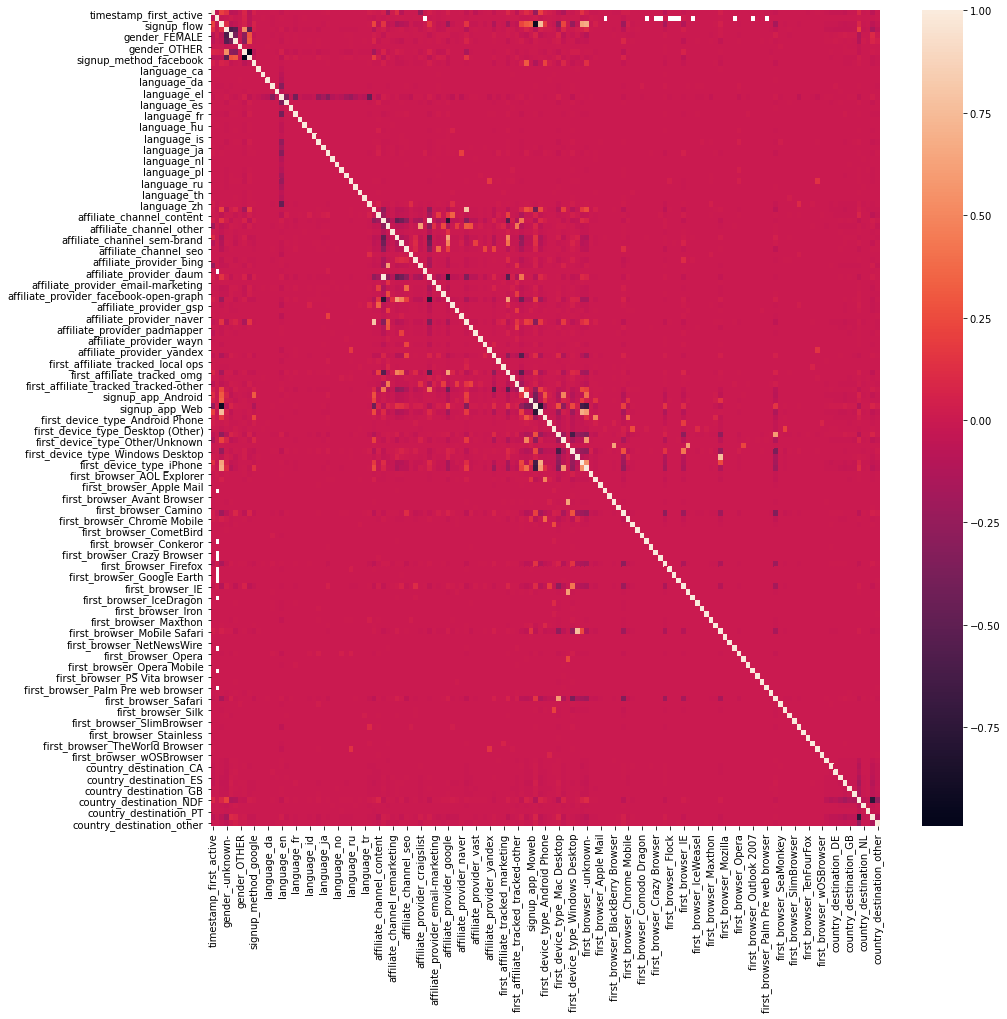

In [83]:
corr=X.corr()
corr=corr.round(2)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr)

plt.show()

In [59]:
# # import matplotlib.pyplot as plt
# import seaborn as sns

# corr=df_train.corr()
# corr=corr.round(2)
# f,ax = plt.subplots(figsize=(5,5))
# sns.heatmap(corr, cmap="Blues", annot=True)

# plt.show()

## Etape 2

### - Conversion de type/format

### descripteur age

In [60]:
df_train["age"].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [61]:
#On remplace les ages > 100 et NaN par np.nan et NaN car on considère que les valeurs sont abérante
df_train['age'].replace('NaN',np.nan, inplace=True)
df_train['age'] = df_train['age'].apply(lambda age : np.nan if age > 100 else age)
df_train["age"].describe()

count    123116.00000
mean         36.54434
std          11.70834
min           1.00000
25%          28.00000
50%          34.00000
75%          42.00000
max         100.00000
Name: age, dtype: float64

In [62]:
#elimination de lignes  NaN
df_train.dropna(inplace=True)

In [63]:
#check missed values
df_train.isnull().values.any()

False

In [64]:
df_train["age"].describe()

count    66855.000000
mean        36.125077
std         11.195329
min          2.000000
25%         28.000000
50%         33.000000
75%         41.000000
max        100.000000
Name: age, dtype: float64

In [65]:
df_train['gender'].replace('-unknown-',np.nan, inplace=True)
df_train['gender'].replace('?',np.nan, inplace=True)
#elimination de lignes  NaN
df_train.dropna(inplace=True)
df_train.isnull().values.any()

False

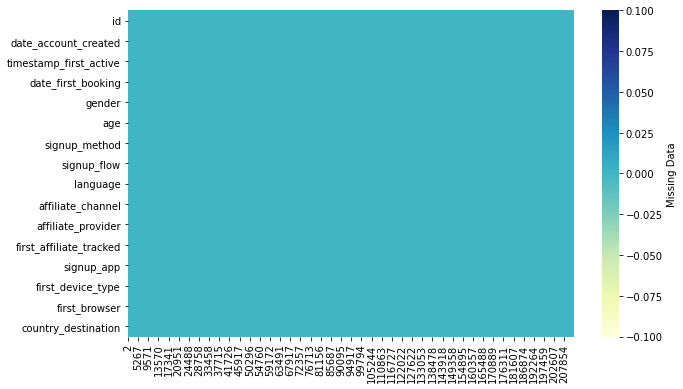

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


### Descripteur timestamp_first_active

In [67]:
#valeur abbérante
df_train["timestamp_first_active"].head()

2    20090609231247
3    20091031060129
6    20100102012558
7    20100103191905
8    20100104004211
Name: timestamp_first_active, dtype: int64

In [68]:
#convertir la date
df_train['date_modif'] = pd.to_datetime(df_train.timestamp_first_active,format="%Y%m%d%H%M%S", errors='ignore')

In [69]:
#extraire l'année 
df_train["annee"] = df_train['date_modif'].dt.year
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_modif,annee
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09 23:12:47,2009
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31 06:01:29,2009
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02 01:25:58,2010
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03 19:19:05,2010
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04 00:42:11,2010
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,2010-01-04 19:42:51,2010
15,v4d5rl22px,2010-01-07,20100107204555,2010-01-08,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA,2010-01-07 20:45:55,2010
19,gdka1q5ktd,2010-01-10,20100110010817,2010-01-10,FEMALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,FR,2010-01-10 01:08:17,2010
21,qsibmuz9sx,2010-01-10,20100110220941,2010-01-11,MALE,30.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,2010-01-10 22:09:41,2010
25,al8bcetz0g,2010-01-12,20100112131444,2010-01-15,FEMALE,26.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,FR,2010-01-12 13:14:44,2010


In [70]:
#Garder que les annee
df_train.drop(['timestamp_first_active', 'date_modif'], axis=1, inplace=True)
df_train.head()

,id,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,annee
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009
6,lsw9q7uk0j,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010
7,0d01nltbrs,2010-01-03,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010
8,a1vcnhxeij,2010-01-04,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213412,a1rvlsdijt,2014-06-30,2015-01-23,FEMALE,50.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US,2014
213439,msucfwmlzc,2014-06-30,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,2014
213441,omlc9iku7t,2014-06-30,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES,2014
213443,0k26r3mir0,2014-06-30,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014


In [84]:
X1 = df_train.select_dtypes(exclude=['object'])

X2 = df_train.select_dtypes(include=[object])

X1.head()

,age,signup_flow,annee
2,56.0,3,2009
3,42.0,0,2009
6,46.0,0,2010
7,47.0,0,2010
8,50.0,0,2010


In [85]:
X2.head()

,id,date_account_created,date_first_booking,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,2010-01-05,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-13,FEMALE,basic,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-07-29,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [86]:
X2 = X2.set_index(['id', 'date_account_created','date_first_booking'])

X2=pd.get_dummies(X2,)

sc = StandardScaler()
Z = sc.fit_transform(X1)
Z1 = pd.DataFrame(data = Z, columns = X1.columns)


X2.reset_index(drop=True, inplace=True)
Z1.reset_index(drop=True, inplace=True)

X=pd.concat([Z1,X2],axis=1)

X=pd.DataFrame(X)
X.head()

,age,signup_flow,annee,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US,country_destination_other
0,1.803612,0.098810,-4.160389,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.541134,-0.372256,-4.160389,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.901842,-0.372256,-3.105833,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.992019,-0.372256,-3.105833,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.262550,-0.372256,-3.105833,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## TestData

In [71]:
df_test = pd.read_csv("test_users.csv")  
df_test.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [72]:
# shape and data types of the data
print(df_test.dtypes)

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking         float64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object


In [73]:
dimension = df_test.shape
NbrLignes = df_test.shape[0]
NbrColonnes = df_test.shape[1]
print("Dimension :",dimension)
print("Nombre de lignes :",NbrLignes)
print("Nombre de colonnes :",NbrColonnes)

Dimension : (62096, 15)
Nombre de lignes : 62096
Nombre de colonnes : 15


In [74]:
#Regarder s'il y a des valeurs nulles dans le fichier
df_test.isnull().values.any() 

True

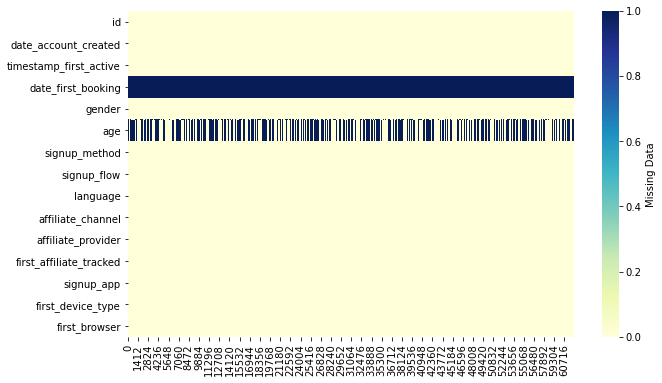

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [76]:
# Trouver les valeurs manquantes et identifier les colonnes
missing_values = ["NaN","?","-unknown-"]
data = pd.read_csv("test_users.csv", na_values = missing_values)
data.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                     33792
age                        28876
signup_method                  0
signup_flow                    0
language                       1
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser              17128
dtype: int64

In [77]:
#Eliminer date_first_booking
df_test.drop(['date_first_booking'], axis=1, inplace=True)

In [78]:
#elimination de lignes NaN
df_test.dropna(inplace=True)

In [79]:
df_test.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
dtype: int64

In [80]:
dimension = df_test.shape
NbrLignes = df_test.shape[0]
NbrColonnes = df_test.shape[1]
print("Dimension :",dimension)
print("Nombre de lignes :",NbrLignes)
print("Nombre de colonnes :",NbrColonnes)

Dimension : (33208, 14)
Nombre de lignes : 33208
Nombre de colonnes : 14


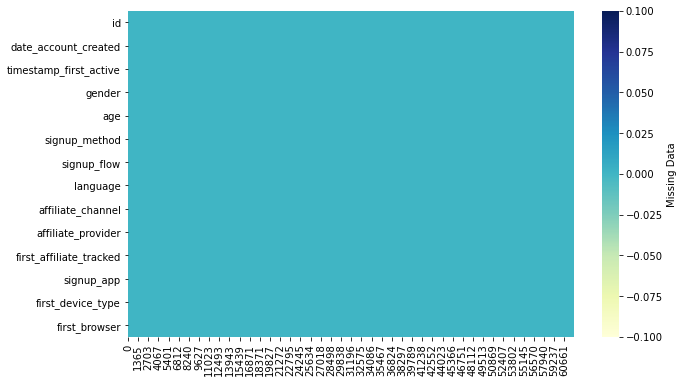

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [87]:
df_test.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
5,szx28ujmhf,2014-07-01,20140701000336,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
11,fyomoivygn,2014-07-01,20140701002531,FEMALE,30.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
12,iq4kkd5oan,2014-07-01,20140701002539,MALE,24.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Safari


In [88]:
X1 = df_test.select_dtypes(exclude=['object'])

X2 = df_test.select_dtypes(include=[object])

X1.head()

,timestamp_first_active,age,signup_flow
0,20140701000006,35.0,0
5,20140701000336,28.0,0
6,20140701000514,48.0,25
11,20140701002531,30.0,25
12,20140701002539,24.0,0


In [89]:
X2.head()

,id,date_account_created,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,FEMALE,facebook,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
5,szx28ujmhf,2014-07-01,FEMALE,basic,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,MALE,basic,en,direct,direct,untracked,iOS,iPhone,-unknown-
11,fyomoivygn,2014-07-01,FEMALE,basic,en,direct,direct,untracked,iOS,iPhone,-unknown-
12,iq4kkd5oan,2014-07-01,MALE,facebook,en,direct,direct,linked,Web,Mac Desktop,Safari


In [90]:
X2 = X2.set_index(['id', 'date_account_created'])

X2=pd.get_dummies(X2,)

sc = StandardScaler()
Z = sc.fit_transform(X1)
Z1 = pd.DataFrame(data = Z, columns = X1.columns)


X2.reset_index(drop=True, inplace=True)
Z1.reset_index(drop=True, inplace=True)

X=pd.concat([Z1,X2],axis=1)

X=pd.DataFrame(X)
X.head()

,timestamp_first_active,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,...,first_browser_Mobile Safari,first_browser_Opera,first_browser_Opera Mobile,first_browser_Pale Moon,first_browser_Safari,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_UC Browser,first_browser_Yandex.Browser
0,-1.380823,-0.035182,-0.627073,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-1.380819,-0.129201,-0.627073,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.380816,0.139426,1.653072,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.380791,-0.102338,1.653072,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.380791,-0.182926,-0.627073,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
